In [ ]:
#Before proceeding to answer questions 2.1 and 2.3 I will be cleaning my data using python

In [6]:
import pandas as pd
file_path = r"/Users/cristinaortiz/Downloads/dognition_data_aggregated_by_dogid (2).xlsx"
data = pd.read_excel(file_path)

data['Gender'] = data['Gender'].fillna("Unknown")
data['Breed'] = data['Breed'].fillna("Unknown")
data['City'] = data['City'].fillna("Unknown")
data['State'] = data['State'].fillna("Unknown")
data['Country'] = data['Country'].fillna("Unknown")

# Dropping rows with missing values in columns I will be using to answer question 2.1 and 2.2
data = data.dropna(subset=['Total Tests Completed', 'User ID'])

data['Gender'] = data['Gender'].astype(str)
data['Breed'] = data['Breed'].astype(str)
data['City'] = data['City'].astype(str)
data['State'] = data['State'].astype(str)
data['Country'] = data['Country'].astype(str)

# Verify the cleaning process
print("Missing values per column:")
print(data.isnull().sum())

print("\nPreview of cleaned dataset:")
print(data.head())


Missing values per column:
Dog ID                                                0
Total Tests Completed                                 0
Mean ITI (days)                                    1268
Mean ITI (minutes)                                 1268
Median ITI (days)                                  1268
Median ITI (minutes)                               1268
Time diff between first and last game (days)          0
Time diff between first and last game (minutes)       0
User ID                                               0
Gender                                                0
Birthday                                              0
Breed                                                 0
Breed_Type                                            0
Breed_Group                                           0
Weight                                                0
Dog_Fixed                                             0
DNA_Tested                                            0
Dimension            

In [32]:
# Exporting my cleaned data to visualize in Tableau
cleaned_file_path = '/Users/cristinaortiz/Downloads/cleaned_dognition_data.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset has been exported to: {cleaned_file_path}")


Cleaned dataset has been exported to: /Users/cristinaortiz/Downloads/cleaned_dognition_data.csv


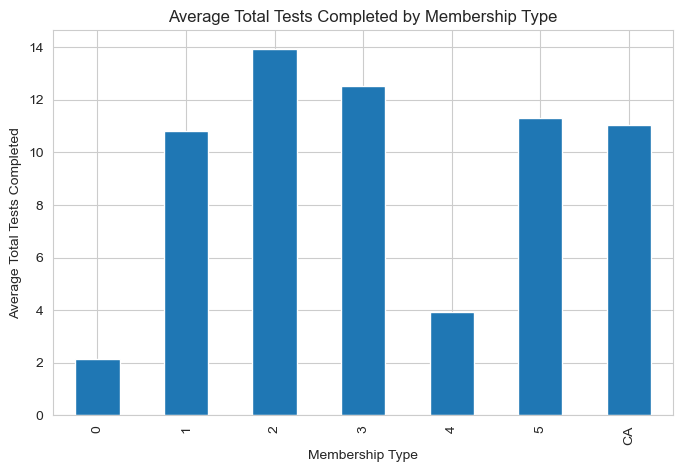

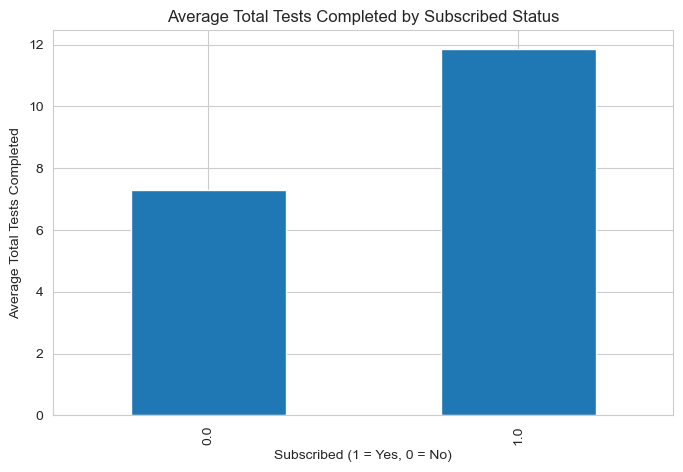

In [40]:
#Question 2.1
import matplotlib.pyplot as plt

# Visual Average Total Tests Completed by Membership Type
membership_avg = data.groupby("Membership_Type")["Total Tests Completed"].mean()

plt.figure(figsize=(8, 5))
membership_avg.plot(kind="bar")
plt.title("Average Total Tests Completed by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Average Total Tests Completed")
plt.show()

# Visual Average Total Tests Completed by Subscribed Status
subscribed_avg = data.groupby("Subscribed")["Total Tests Completed"].mean()

plt.figure(figsize=(8, 5))
subscribed_avg.plot(kind="bar")
plt.title("Average Total Tests Completed by Subscribed Status")
plt.xlabel("Subscribed (1 = Yes, 0 = No)")
plt.ylabel("Average Total Tests Completed")
plt.show()



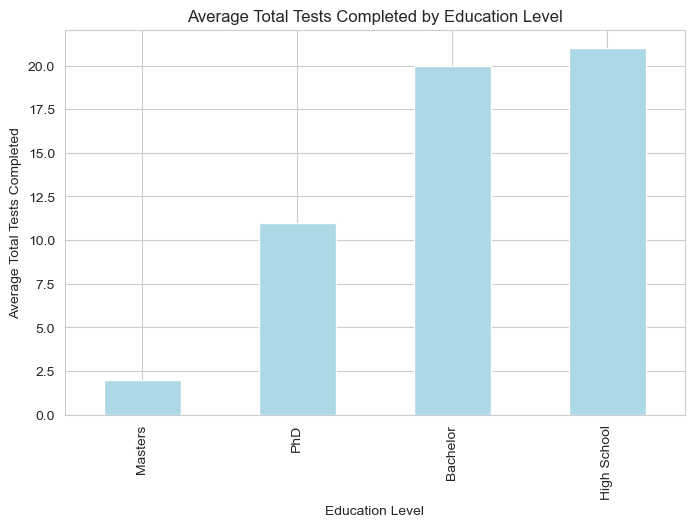

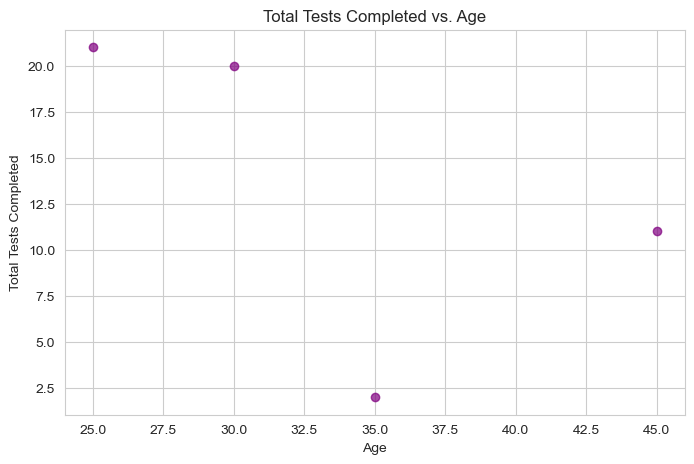

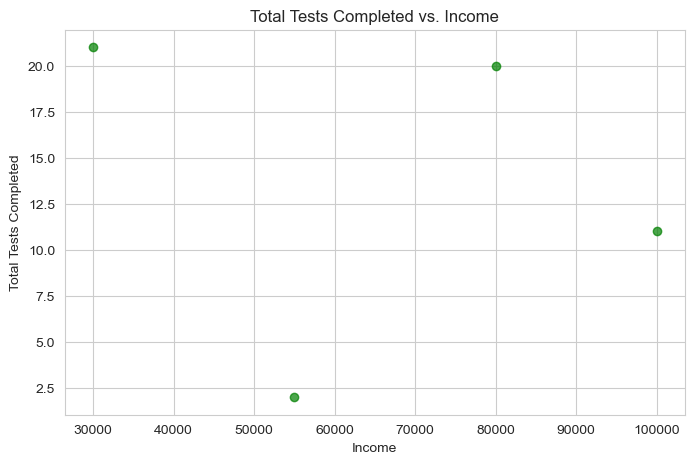

In [60]:
#Code for question 2.2
data_subset = data.head(4).copy()
data_subset['Education'] = ['High School', 'Bachelor', 'Masters', 'PhD',]
data_subset['Age'] = [25, 30,  35, 45]
data_subset['Income'] = [30000,80000,55000, 100000]

education_avg = data_subset.groupby("Education")["Total Tests Completed"].mean()

plt.figure(figsize=(8, 5))
education_avg.sort_values().plot(kind="bar", color="lightblue")
plt.title("Average Total Tests Completed by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Total Tests Completed")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data_subset["Age"], data_subset["Total Tests Completed"], alpha=0.7, color="purple")
plt.title("Total Tests Completed vs. Age")
plt.xlabel("Age")
plt.ylabel("Total Tests Completed")
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(data_subset["Income"], data_subset["Total Tests Completed"], alpha=0.7, color="green")
plt.title("Total Tests Completed vs. Income")
plt.xlabel("Income")
plt.ylabel("Total Tests Completed")
plt.show()
